<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Sepehr kazemi Ranjbar

**Student ID**: 99106599

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [3]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [14]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=2/9)
### END CODE HERE ###

## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: C = 3

In [18]:
### START CODE HERE ###
m,n = X_val.shape
C = np.arange(0.1,10,0.1)
accuracy = np.zeros(len(C))
i = 0
for c in C:
    clf = LogisticRegression(C=c,solver='liblinear').fit(X_train,Y_train)
    output = clf.predict(X_val)
    accuracy[i] = 1/m*(output == Y_val).sum()
    i+=1
print(C[np.argmax(accuracy)])
### END CODE HERE ###

3.0000000000000004


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: 0.930

In [16]:
### START CODE HERE ###
m,n = X_test.shape
clf = LogisticRegression(C=3,solver='liblinear').fit(X_train,Y_train)
output = clf.predict(X_test)
accuracy = 1/m*(output == Y_test).sum()
accuracy
### END CODE HERE ###

0.9298245614035088

For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

In [26]:
# define the visualization function
def visualizeClassificationAreas(usedClassifier,XtrainSet, ytrainSet,XtestSet, ytestSet, plotDensity=0.01 ):
    '''
    This function visualizes the classification regions on the basis of the provided data
 
    usedClassifier      - used classifier
 
    XtrainSet,ytrainSet - train sets of features and target classes 
                    - the region colors correspond to to the class numbers in ytrainSet
 
    XtestSet,ytestSet   - test sets for visualizng the performance on test data that is not used for training
                    - this is optional argument provided if the test data is available
 
    plotDensity         - density of the area plot, smaller values are making denser and more precise plots
 
    IMPORTANT COMMENT:  -If the number of classes is larger than the number of elements in the list 
                    caller "colorList", you need to increase the number of colors in 
                    "colorList"
                    - The same comment applies to "markerClass" list defined below
 
    '''
    import numpy as np
    import matplotlib.pyplot as plt    
    # this function is used to create a "cmap" color object that is used to distinguish different classes
    from matplotlib.colors import ListedColormap 
     
    # this list is used to distinguish different classification regions
    # every color corresponds to a certain class number
    colorList=["blue", "green", "orange", "magenta", "purple", "red"]
    # this list of markers is used to distingush between different classe
    # every symbol corresponds to a certain class number
    markerClass=['x','o','v','#','*','>']
     
    # get the number of different classes 
    classesNumbers=np.unique(ytrainSet)
    numberOfDifferentClasses=classesNumbers.size
                  
    # create a cmap object for plotting the decision areas
    cmapObject=ListedColormap(colorList, N=numberOfDifferentClasses)
                  
    # get the limit values for the total plot
    x1featureMin=min(XtrainSet[:,0].min(),XtestSet[:,0].min())-0.5
    x1featureMax=max(XtrainSet[:,0].max(),XtestSet[:,0].max())+0.5
    x2featureMin=min(XtrainSet[:,1].min(),XtestSet[:,1].min())-0.5
    x2featureMax=max(XtrainSet[:,1].max(),XtestSet[:,1].max())+0.5
         
    # create the meshgrid data for the classifier
    x1meshGrid,x2meshGrid = np.meshgrid(np.arange(x1featureMin,x1featureMax,plotDensity),np.arange(x2featureMin,x2featureMax,plotDensity))
         
    # basically, we will determine the regions by creating artificial train data 
    # and we will call the classifier to determine the classes
    XregionClassifier = np.array([x1meshGrid.ravel(),x2meshGrid.ravel()]).T
    # call the classifier predict to get the classes
    predictedClassesRegion=usedClassifier.predict(XregionClassifier)
    # the previous code lines return the vector and we need the matrix to be able to plot
    predictedClassesRegion=predictedClassesRegion.reshape(x1meshGrid.shape)
    # here we plot the decision areas
    # there are two subplots - the left plot will plot the decision areas and training samples
    # the right plot will plot the decision areas and test samples
    fig, ax = plt.subplots(1,2,figsize=(15,8))
    ax[0].contourf(x1meshGrid,x2meshGrid,predictedClassesRegion,alpha=0.3,cmap=cmapObject)
    ax[1].contourf(x1meshGrid,x2meshGrid,predictedClassesRegion,alpha=0.3,cmap=cmapObject)
     
    # scatter plot of features belonging to the data set 
    for index1 in np.arange(numberOfDifferentClasses):
        ax[0].scatter(XtrainSet[ytrainSet==classesNumbers[index1],0],XtrainSet[ytrainSet==classesNumbers[index1],1], 
                   alpha=1, c=colorList[index1], marker=markerClass[index1], 
                   label="Class {}".format(classesNumbers[index1]), edgecolor='black', s=80)
         
        ax[1].scatter(XtestSet[ytestSet==classesNumbers[index1],0],XtestSet[ytestSet==classesNumbers[index1],1], 
                   alpha=1, c=colorList[index1], marker=markerClass[index1],
                   label="Class {}".format(classesNumbers[index1]), edgecolor='black', s=80)
         
    ax[0].set_xlabel("Feature X1",fontsize=14)
    ax[0].set_ylabel("Feature X2",fontsize=14)
    ax[0].text(0.05, 0.05, "Decision areas and training samples", transform=ax[0].transAxes, fontsize=14, verticalalignment='bottom')
    ax[0].legend(fontsize=14)
     
    ax[1].set_xlabel("Feature X1",fontsize=14)
    ax[1].set_ylabel("Feature X2",fontsize=14)
    ax[1].text(0.05, 0.05, "Decision areas and test samples", transform=ax[1].transAxes, fontsize=14, verticalalignment='bottom')
    #ax[1].legend()
    plt.show()
    #plt.savefig('classification_results.png')

In [22]:
### START CODE HERE ###
# here we find beest value for C
X_train_new = X_train[:,[0,1]]
X_val_new = X_val[:,[0,1]]
X_test_new = X_test[:,[0,1]]
m,n = X_val.shape
C = np.arange(0.1,10,0.1)
accuracy = np.zeros(len(C))
i = 0
for c in C:
    clf = LogisticRegression(C=c,solver='liblinear').fit(X_train_new,Y_train)
    output = clf.predict(X_val_new)
    accuracy[i] = 1/m*(output == Y_val).sum()
    i+=1
print(C[np.argmax(accuracy)])
### END CODE HERE ###
### END CODE HERE ###

0.5


C:\Users\sepeh\AppData\Local\Temp\ipykernel_10012\52411148.py:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[0].scatter(XtrainSet[ytrainSet==classesNumbers[index1],0],XtrainSet[ytrainSet==classesNumbers[index1],1],
C:\Users\sepeh\AppData\Local\Temp\ipykernel_10012\52411148.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[1].scatter(XtestSet[ytestSet==classesNumbers[index1],0],XtestSet[ytestSet==classesNumbers[index1],1],


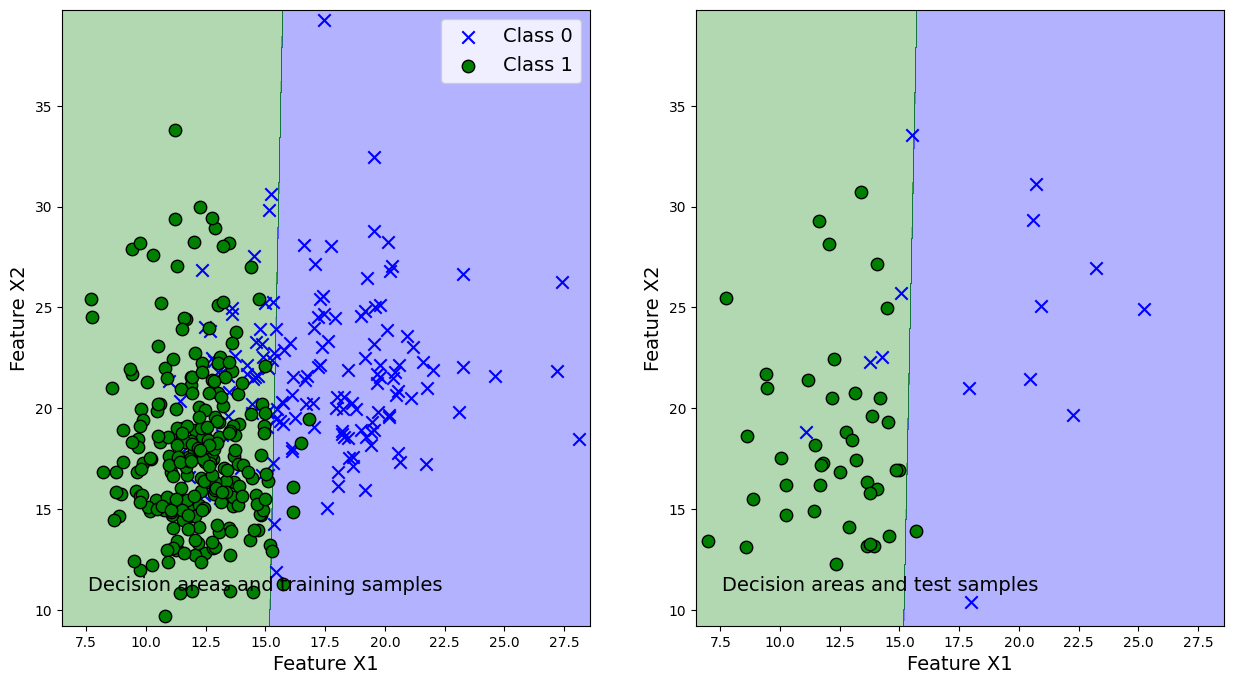

In [27]:
# we find C = 0.5
m,n = X_test.shape
clf = LogisticRegression(C=0.5,solver='liblinear').fit(X_train_new,Y_train)
visualizeClassificationAreas(clf,X_train_new,Y_train,X_test_new,Y_test)

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer** : 0.965

In [29]:
### START CODE HERE ###
m,n = X_test.shape
clf = GaussianNB()
clf.fit(X_train,Y_train)
output = clf.predict(X_test)
accuracy = 1/m*(output == Y_test).sum()
accuracy
### END CODE HERE ###

0.9649122807017543

## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer** : 0.982

In [30]:
### START CODE HERE ###
m,n = X_test.shape
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,Y_train)
output = clf.predict(X_test)
accuracy = 1/m*(output == Y_test).sum()
accuracy
### END CODE HERE ###

0.9824561403508771

## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: best model as disscused in class is Nave Bayes but here LDA has the most accuracy on test data